## Regression
#### Submitted By : Elizabeth Raju

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


### 1. Loading and Preprocessing

In [12]:
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
california_housing = fetch_california_housing()
df = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)
df['MedHouseVal'] = california_housing.target

In [13]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [14]:
df.shape

(20640, 9)

In [15]:
df.columns.tolist()

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude',
 'MedHouseVal']

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [17]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Handling misssing values

In [18]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [19]:
cols = df.select_dtypes(include=np.number)
cols.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

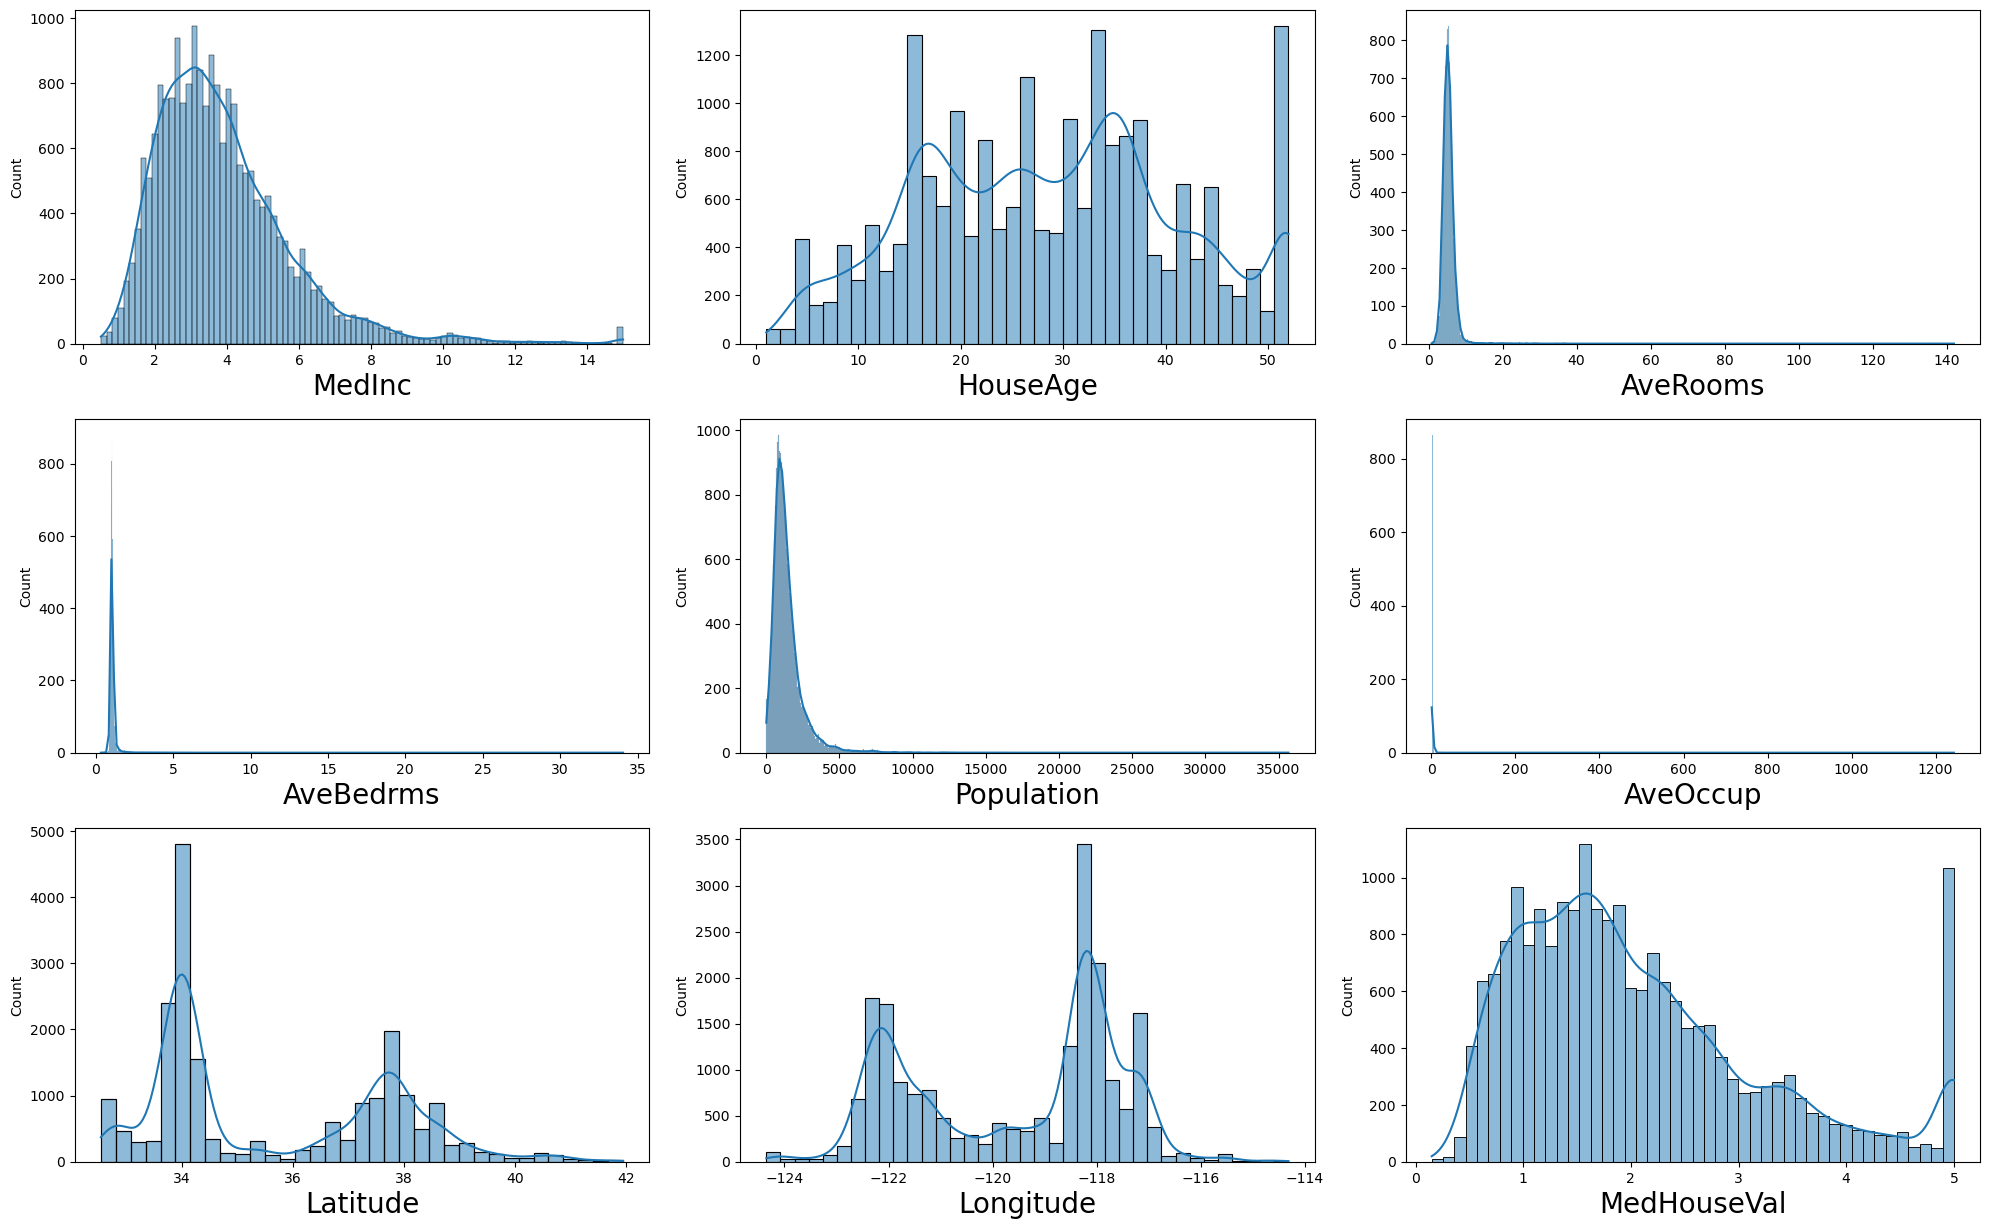

In [20]:
plt.figure(figsize=(20,20))
plotnumber =1
for column in cols:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        sns.histplot(cols[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Handling outliers

In [21]:
outlier_cols = df.select_dtypes(include=np.number)
outlier_cols.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

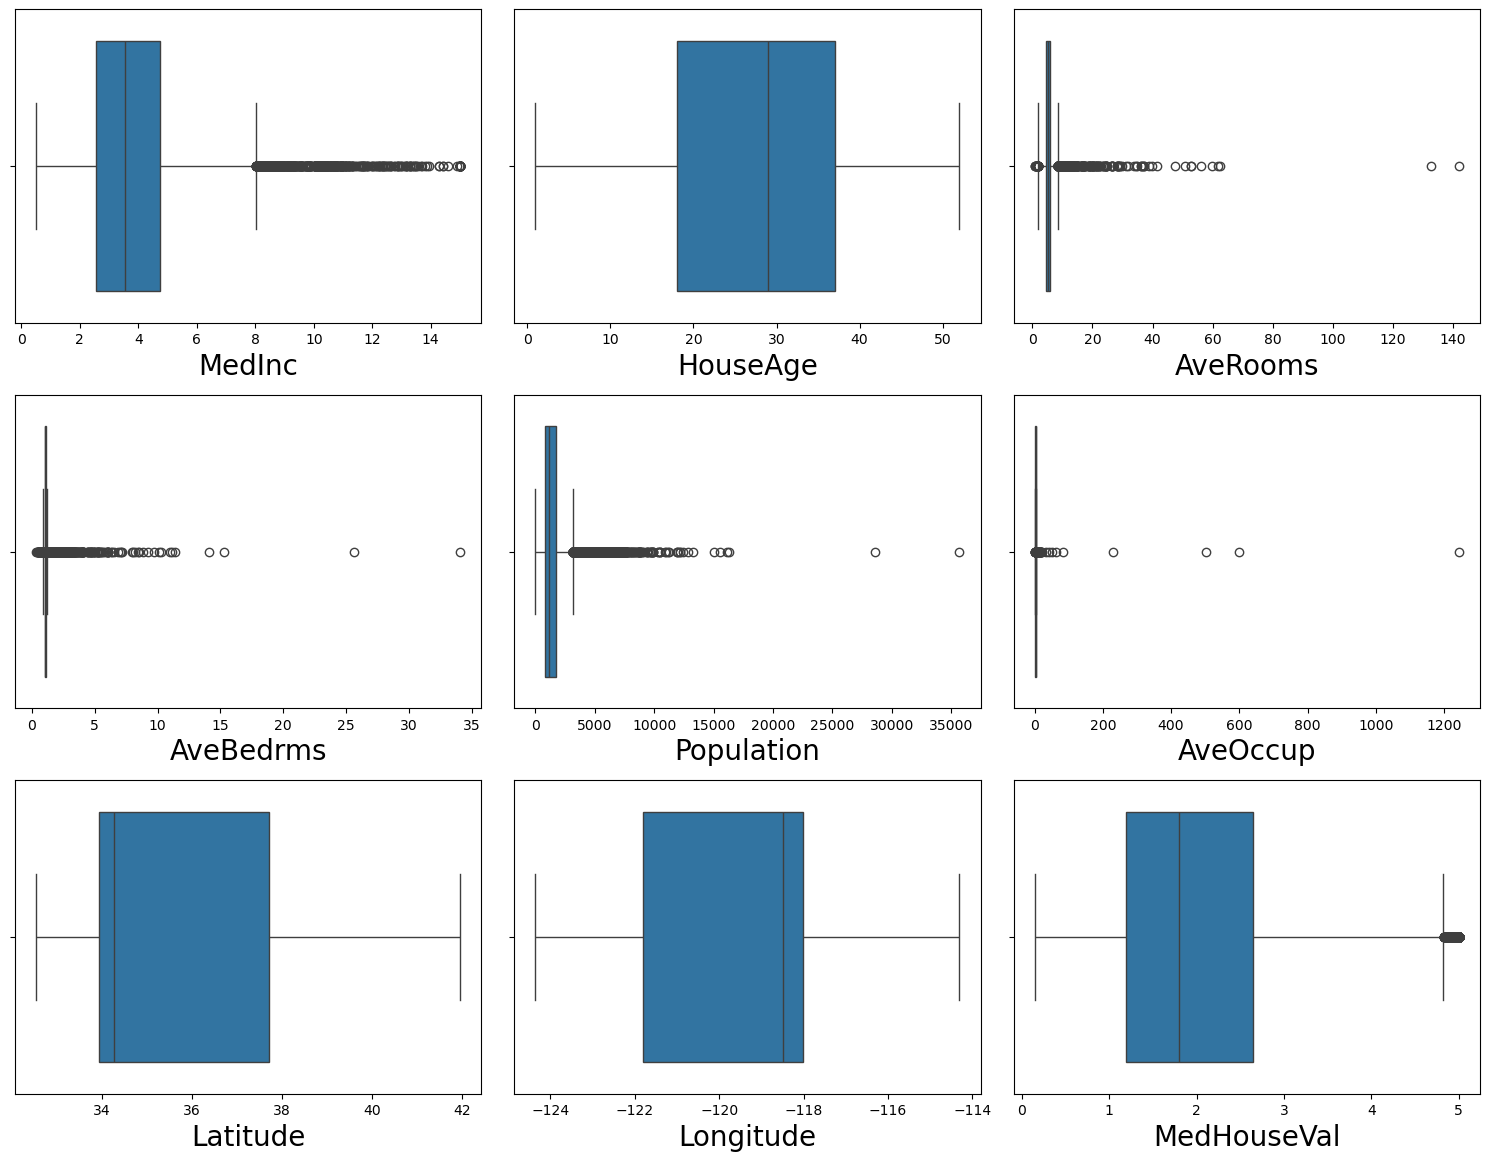

In [22]:
plt.figure(figsize=(15,15))
plotnumber =1
for column in outlier_cols:
    if plotnumber<=15:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(x=column,data=df)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [23]:
def remove_outliers_iqr(data, column):
  q1,q2,q3 = np.percentile(data[column],[25,50,75])
  print("q1,q2,q3 is :",q1,q2,q3)
  IQR = q3-q1
  print("IQR is :" ,IQR)
  lower_limit = q1-(1.5*IQR)
  upper_limit = q3+(1.5*IQR)
  data[column]=np.where(data[column]>upper_limit,upper_limit,data[column]) # Capping the upper limit
  data[column]=np.where(data[column]<lower_limit,lower_limit,data[column]) # Flooring the lower limit

In [24]:
for column in outlier_cols:
  remove_outliers_iqr(df,column)

q1,q2,q3 is : 2.5633999999999997 3.5347999999999997 4.74325
IQR is : 2.17985
q1,q2,q3 is : 18.0 29.0 37.0
IQR is : 19.0
q1,q2,q3 is : 4.440716235896959 5.229128787878788 6.052380952380952
IQR is : 1.6116647164839932
q1,q2,q3 is : 1.006079046038478 1.048780487804878 1.099526066350711
IQR is : 0.09344702031223284
q1,q2,q3 is : 787.0 1166.0 1725.0
IQR is : 938.0
q1,q2,q3 is : 2.4297411475535755 2.818115654360196 3.2822609242736216
IQR is : 0.8525197767200461
q1,q2,q3 is : 33.93 34.26 37.71
IQR is : 3.780000000000001
q1,q2,q3 is : -121.8 -118.49 -118.01
IQR is : 3.789999999999992
q1,q2,q3 is : 1.196 1.797 2.6472499999999997
IQR is : 1.4512499999999997


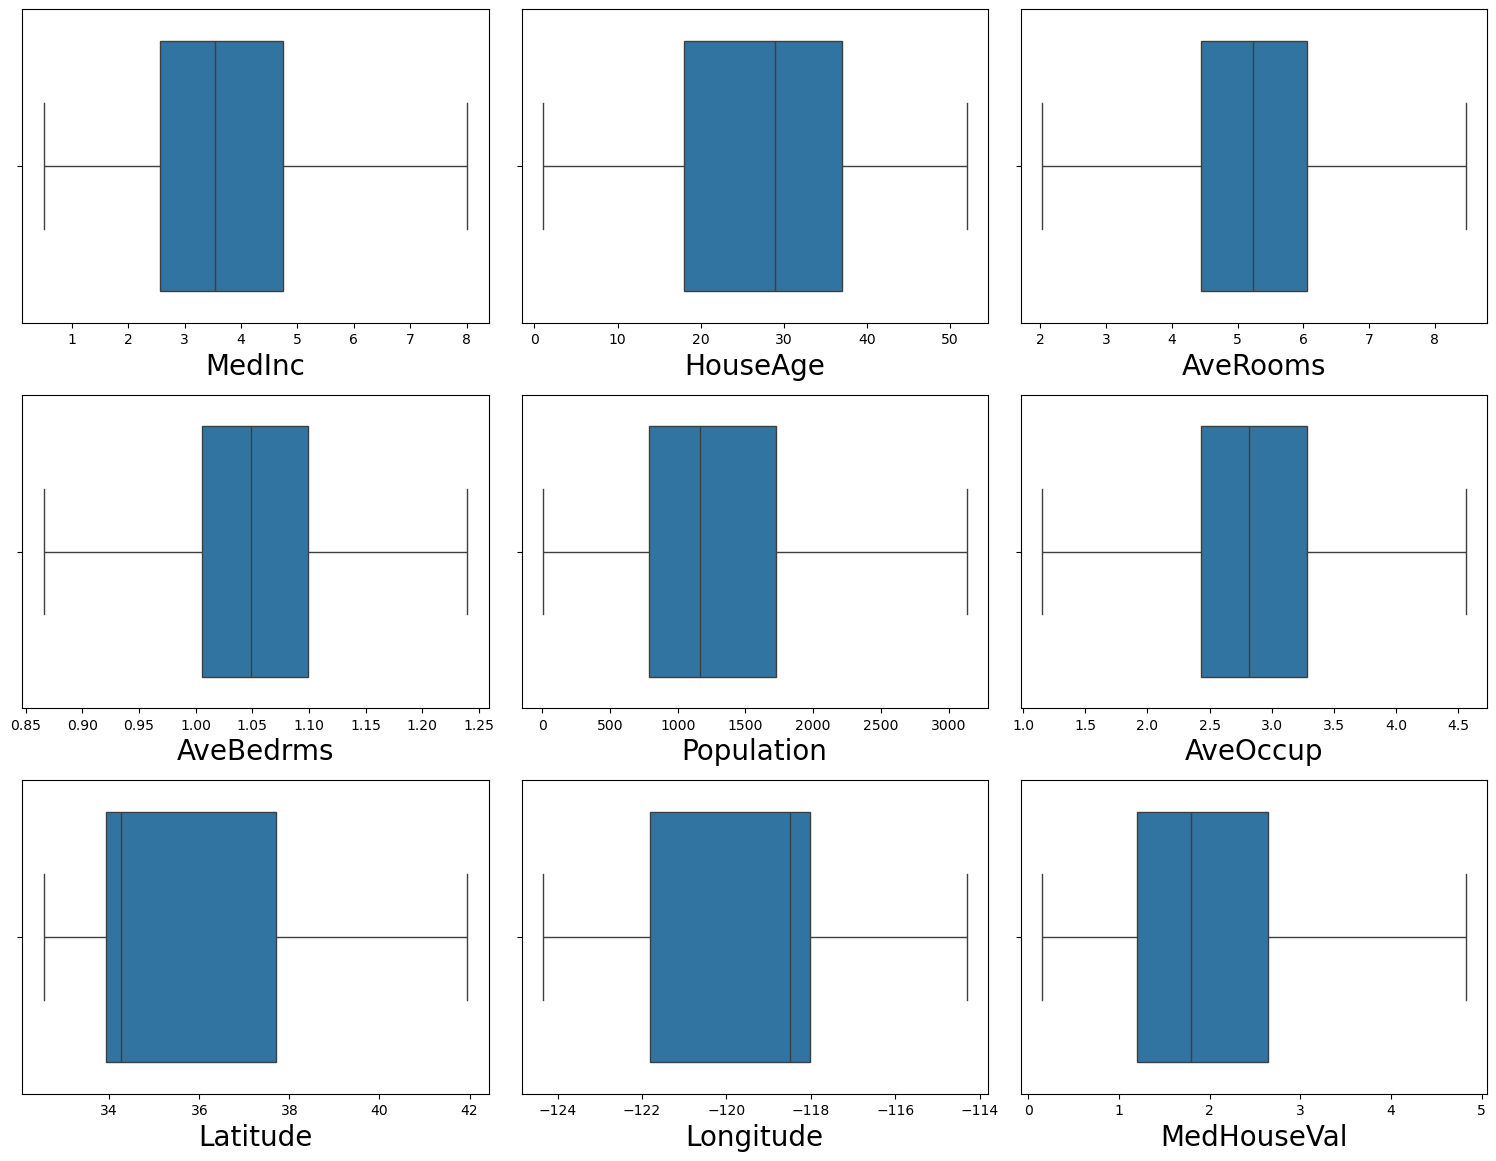

In [25]:
plt.figure(figsize=(15,15))
plotnumber =1
for column in outlier_cols:
    if plotnumber<=15:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(x=column,data=df)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

<Axes: >

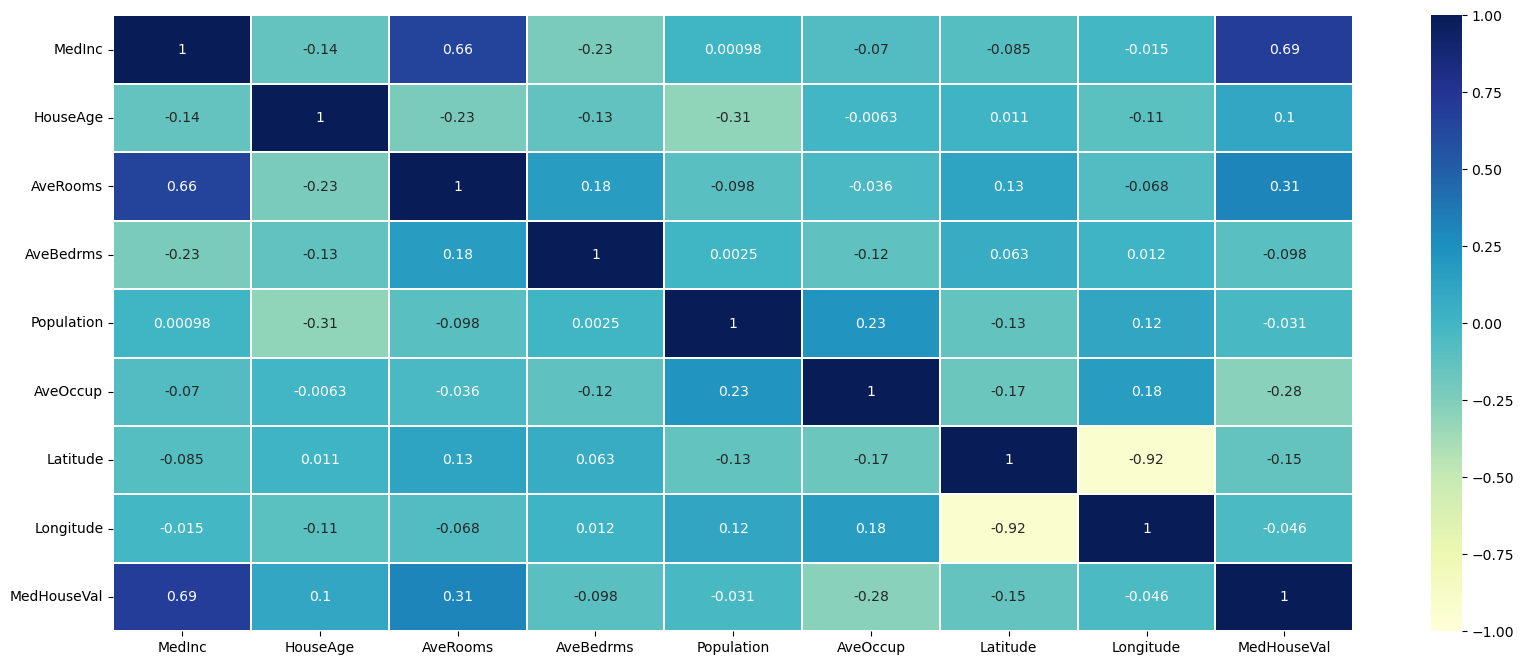

In [26]:
corrmatrix=df.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-1,vmax=1,annot=True,linewidth=.2,cmap='YlGnBu')

In [27]:
for col in df.columns:
    print(f"\nColumn: {col}")
    print("Unique Values:", df[col].unique())
    print("Number of Unique Values:", df[col].nunique())


Column: MedInc
Unique Values: [8.013025 7.2574   5.6431   ... 2.3598   2.3661   2.0943  ]
Number of Unique Values: 12303

Column: HouseAge
Unique Values: [41. 21. 52. 42. 50. 40. 49. 48. 51. 43.  2. 46. 26. 20. 17. 36. 19. 23.
 38. 35. 10. 16. 27. 39. 31. 29. 22. 37. 28. 34. 32. 47. 44. 30. 18. 45.
 33. 24. 15. 14. 13. 25.  5. 12.  6.  8.  9.  7.  3.  4. 11.  1.]
Number of Unique Values: 52

Column: AveRooms
Unique Values: [6.98412698 6.23813708 8.28813559 ... 5.20554273 5.32951289 5.25471698]
Number of Unique Values: 18892

Column: AveBedrms
Unique Values: [1.02380952 0.97188049 1.07344633 ... 1.14825581 1.17191977 1.16226415]
Number of Unique Values: 12944

Column: Population
Unique Values: [ 322. 2401.  496. ...  243. 3060. 2707.]
Number of Unique Values: 2919

Column: AveOccup
Unique Values: [2.55555556 2.10984183 2.80225989 ... 2.3256351  2.12320917 2.61698113]
Number of Unique Values: 18147

Column: Latitude
Unique Values: [37.88 37.86 37.85 37.84 37.83 37.82 37.81 37.8  37.79 3

### Feature scaling

In [28]:
#splitting data into dependent and independent columns
x=df.drop('MedHouseVal',axis=1)
y=df['MedHouseVal']

In [29]:
# standard scaling
standadisation=StandardScaler()
x=standadisation.fit_transform(x)
#Coverting to Dataframe
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,-7.711317e-17,5.508083e-18,2.313395e-16,-6.774942e-16,1.335710e-16,-1.432102e-16,-1.079584e-15,-8.526513e-15
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.991479e+00,-2.196180e+00,-2.633335e+00,-2.387314e+00,-1.742525e+00,-2.530199e+00,-1.447568e+00,-2.385992e+00
25%,-7.466196e-01,-8.453931e-01,-6.933564e-01,-6.448912e-01,-7.184008e-01,-6.799133e-01,-7.967887e-01,-1.113209e+00
50%,-1.605978e-01,2.864572e-02,-6.067586e-02,-1.140809e-01,-2.233204e-01,-1.179684e-01,-6.422871e-01,5.389137e-01
75%,5.684305e-01,6.643103e-01,5.999626e-01,5.167240e-01,5.068904e-01,5.536104e-01,9.729566e-01,7.784964e-01
max,2.541006e+00,1.856182e+00,2.539941e+00,2.259147e+00,2.344827e+00,2.403896e+00,2.958068e+00,2.625280e+00


In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =42,test_size=0.33)

### 2.Regression Algorithm Implementation

In [31]:
# Prepare models 
models = {
    "LinearRegression": LinearRegression(),# - LinearRegression: fits a linear equation — good baseline and interpretable.
    "DecisionTree": DecisionTreeRegressor(random_state=42),# - DecisionTreeRegressor: partitioning; captures non-linearities and interactions.
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),# - RandomForestRegressor: bagged ensemble of trees; reduces variance.
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),# - GradientBoostingRegressor: sequential boosting of trees; often high accuracy on tabular data.
    "SVR": SVR(kernel='rbf', C=10.0, gamma='scale')  # - SVR: kernel-based regression; can model non-linear relationships but sensitive to scale and large datasets.
}
for name,model in models.items():
    model.fit(x_train,y_train)
    print(name+'  trained')

LinearRegression  trained
DecisionTree  trained
RandomForest  trained
GradientBoosting  trained
SVR  trained


### 3.Model Evaluation and Comparison

In [32]:

results = []

for name, model in models.items():
    y_pred = model.predict(x_test)   # predictions
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "MSE": mse,
        "MAE": mae,
        "R2": r2
    })

In [33]:
results_df = pd.DataFrame(results)
print(results_df)

              Model       MSE       MAE        R2
0  LinearRegression  0.431712  0.491261  0.663683
1      DecisionTree  0.525623  0.470570  0.590523
2      RandomForest  0.248768  0.332418  0.806202
3  GradientBoosting  0.277052  0.365325  0.784168
4               SVR  0.288053  0.359794  0.775598


In [34]:
best = results_df.loc[results_df['R2'].idxmax()]
worst = results_df.loc[results_df['R2'].idxmin()]

print("\nBest model:", best['Model'], "with R² =", best['R2'])
print("Worst model:", worst['Model'], "with R² =", worst['R2'])




Best model: RandomForest with R² = 0.8062017892038724
Worst model: DecisionTree with R² = 0.5905232231328834


In [35]:
# Save evaluation results CSV
results_df.to_csv("regression_results.csv", index=False)

